In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df= pd.read_csv('C:\DS\Projects\Data Analysis\Electricity Generation in India\datasets_737822_1290921_file.csv')
df.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [97]:
#As there is no Nuclear generation in 'East' and 'NorthEast' region, lets replace NaN with 0
df[['Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)']]= df[['Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)']]. fillna(0)
df.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


In [98]:
#Now lets add year column so that we can analyze yearly increase in energy generation
df['Year']= df['Date'].str[0:4]
df.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Year
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81,2017
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53,2017
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78,2017
3,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36,2017
4,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21,2017


In [99]:
list(df.columns)

['Date',
 'Region',
 'Thermal Generation Actual (in MU)',
 'Thermal Generation Estimated (in MU)',
 'Nuclear Generation Actual (in MU)',
 'Nuclear Generation Estimated (in MU)',
 'Hydro Generation Actual (in MU)',
 'Hydro Generation Estimated (in MU)',
 'Year']

In [100]:
df=df[['Year','Date',
 'Region',
 'Thermal Generation Actual (in MU)',
 'Thermal Generation Estimated (in MU)',
 'Nuclear Generation Actual (in MU)',
 'Nuclear Generation Estimated (in MU)',
 'Hydro Generation Actual (in MU)',
 'Hydro Generation Estimated (in MU)']]
df.head()

,Year,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


### Calculate the sector wise electricity generated in 2017

In [101]:
df['Thermal Generation Actual (in MU)']=df['Thermal Generation Actual (in MU)'].apply(lambda x: x.replace(',',''))
df.head()

,Year,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017,2017-09-01,Western,1106.89,"1,024.33",25.17,3.81,72.00,21.53
2,2017,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


In [102]:
df['Thermal Generation Estimated (in MU)']=df['Thermal Generation Estimated (in MU)'].apply(lambda x: x.replace(',',''))
df.head()

,Year,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53
2,2017,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


In [103]:
df['Thermal Generation Actual (in MU)']= pd.to_numeric(df['Thermal Generation Actual (in MU)'])
df.head()

,Year,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53
2,2017,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


In [104]:
df['Thermal Generation Estimated (in MU)']= pd.to_numeric(df['Thermal Generation Estimated (in MU)'])
df.head()

,Year,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53
2,2017,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


In [105]:
df_2017= df[df.Year=='2017']
df_2017.head()

,Year,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53
2,2017,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


In [106]:
sum(df_2017['Thermal Generation Actual (in MU)'])

340769.45

In [107]:
sum(df_2017['Thermal Generation Estimated (in MU)'])

337741.1200000002

In [108]:
df_2017.sum()

Year                                    2017201720172017201720172017201720172017201720...
Date                                    2017-09-012017-09-012017-09-012017-09-012017-0...
Region                                  NorthernWesternSouthernEasternNorthEasternNort...
Thermal Generation Actual (in MU)                                                  340769
Thermal Generation Estimated (in MU)                                               337741
Nuclear Generation Actual (in MU)                                                 11961.5
Nuclear Generation Estimated (in MU)                                              12999.3
Hydro Generation Actual (in MU)                                                   44564.5
Hydro Generation Estimated (in MU)                                                38550.8
dtype: object

In [109]:
df17ac= df_2017[["Thermal Generation Actual (in MU)", "Nuclear Generation Actual (in MU)", "Hydro Generation Actual (in MU)"]]
df17ac

,Thermal Generation Actual (in MU),Nuclear Generation Actual (in MU),Hydro Generation Actual (in MU)
0,624.23,30.36,273.27
1,1106.89,25.17,72.00
2,576.66,62.73,111.57
3,441.02,0.00,85.94
4,29.11,0.00,24.64
...,...,...,...
600,633.37,30.60,105.23
601,1114.67,25.16,42.27
602,631.62,45.40,69.72
603,474.71,0.00,22.60


In [110]:
ac17=pd.DataFrame(df17ac.sum())
ac17

,0
Thermal Generation Actual (in MU),340769.45
Nuclear Generation Actual (in MU),11961.55
Hydro Generation Actual (in MU),44564.53


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


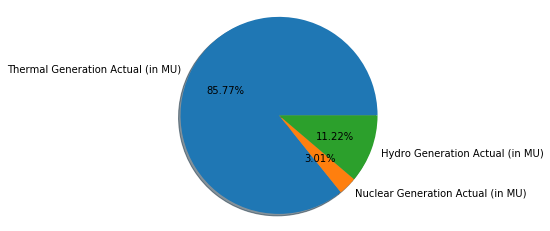

In [111]:
#Now lets create pieplot for actual elecricity generation in 2017
plt.pie(ac17, labels=['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)',
                        'Hydro Generation Actual (in MU)'], autopct='%0.2f%%', shadow=True)
plt.axis('equal')
plt.show()

#### Sector wise electricity generation in 2017
* Thermal Generation- 85.77%
* Nuclear Generation-  3.01%
* Hydro Generation- 11.22%

### Compare the estimated and actual electricity generation in 2017

In [112]:
df_2017

,Year,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53
2,2017,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21
...,...,...,...,...,...,...,...,...,...
600,2017,2017-12-31,Northern,633.37,626.54,30.60,32.52,105.23,108.80
601,2017,2017-12-31,Western,1114.67,1161.67,25.16,26.14,42.27,16.30
602,2017,2017-12-31,Southern,631.62,541.31,45.40,71.35,69.72,39.09
603,2017,2017-12-31,Eastern,474.71,446.42,0.00,0.00,22.60,22.85


In [113]:
#actual energy generation in 2017
ac17

,0
Thermal Generation Actual (in MU),340769.45
Nuclear Generation Actual (in MU),11961.55
Hydro Generation Actual (in MU),44564.53


In [114]:
ac17=ac17.reset_index()
ac17.rename(columns= {0:'Actual'}, inplace=True)
ac17.rename(columns= {'index':'ac_index'}, inplace=True)
ac17

,ac_index,Actual
0,Thermal Generation Actual (in MU),340769.45
1,Nuclear Generation Actual (in MU),11961.55
2,Hydro Generation Actual (in MU),44564.53


In [115]:
df17est= df_2017[['Thermal Generation Estimated (in MU)', 'Nuclear Generation Estimated (in MU)', 'Hydro Generation Estimated (in MU)']]
df17est

,Thermal Generation Estimated (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Estimated (in MU)
0,484.21,35.57,320.81
1,1024.33,3.81,21.53
2,578.55,49.80,64.78
3,429.39,0.00,69.36
4,15.91,0.00,21.21
...,...,...,...
600,626.54,32.52,108.80
601,1161.67,26.14,16.30
602,541.31,71.35,39.09
603,446.42,0.00,22.85


In [116]:
est17=pd.DataFrame(df17est.sum())
est17

,0
Thermal Generation Estimated (in MU),337741.12
Nuclear Generation Estimated (in MU),12999.28
Hydro Generation Estimated (in MU),38550.80


In [117]:
est17=est17.reset_index()
est17.rename(columns= {0: 'Estimated'}, inplace=True)
est17.rename(columns= {'index': 'est_index'}, inplace=True)
est17

,est_index,Estimated
0,Thermal Generation Estimated (in MU),337741.12
1,Nuclear Generation Estimated (in MU),12999.28
2,Hydro Generation Estimated (in MU),38550.80


TypeError: 'str' object is not callable

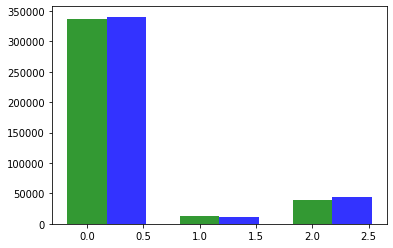

In [118]:
#Follow this graph not the one after this
grp=3
fig,ax=plt.subplots()
index=np.arange(grp)
bar_width= 0.35
opacity= 0.8

rect1= plt.bar(index, est17['Estimated'], bar_width, alpha=opacity, color='g', label='Estimated')
rect2= plt.bar(index+bar_width, ac17['Actual'], bar_width, alpha=opacity, color='b', label='Actual')

plt.xlabel('Source')
plt.ylabel('Energy Generated in MU')
plt.xticks(index+bar_width, ('Thermal', 'Nuclear', 'Hydro'))
plt.legend

plt.tight_layout()
plt.show()

In [119]:
data={'index':['Thermal Generation Estimated (in MU)','Thermal Generation Actual (in MU)','Nuclear Generation Estimated (in MU)',
                        'Nuclear Generation Actual (in MU)','Hydro Generation Estimated (in MU)','Hydro Generation Actual (in MU)'],
               'values':[337741.12,340769.45,12999.28,11961.55,38550.80,44564.53]}
dff=pd.DataFrame(data)
dff

,index,values
0,Thermal Generation Estimated (in MU),337741.12
1,Thermal Generation Actual (in MU),340769.45
2,Nuclear Generation Estimated (in MU),12999.28
3,Nuclear Generation Actual (in MU),11961.55
4,Hydro Generation Estimated (in MU),38550.80
5,Hydro Generation Actual (in MU),44564.53


TypeError: 'str' object is not callable

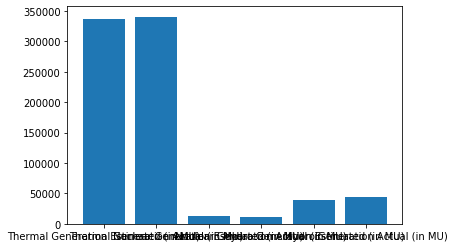

In [120]:
plt.bar('index', 'values', data=dff)
plt.ylabel('MU')

### Calculate region wise energy generation in 2018
* First take row sum column 
* Separate the data for year 2018
* Use groupby function for region column

In [121]:
df.head()

,Year,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53
2,2017,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


In [122]:
df.sum(axis=1)

0       1768.45
1       2253.73
2       1444.09
3       1025.71
4         90.87
         ...   
4630    1444.74
4631    2803.07
4632    1551.94
4633    1136.51
4634      83.57
Length: 4635, dtype: float64

In [123]:
df['Total']=df.sum(axis=1)
df

,Year,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total
0,2017,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81,1768.45
1,2017,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53,2253.73
2,2017,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78,1444.09
3,2017,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36,1025.71
4,2017,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21,90.87
...,...,...,...,...,...,...,...,...,...,...
4630,2020,2020-03-17,Northern,683.49,439.09,26.23,30.37,124.40,141.16,1444.74
4631,2020,2020-03-17,Western,1326.61,1295.95,45.47,40.66,31.53,62.85,2803.07
4632,2020,2020-03-17,Southern,639.01,619.75,67.16,67.40,81.21,77.41,1551.94
4633,2020,2020-03-17,Eastern,498.78,575.93,0.00,0.00,30.34,31.46,1136.51


In [124]:
df=df[df.Year=='2018']
df.head()

,Year,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total
605,2018,2018-01-01,Northern,626.60,625.16,30.31,32.09,96.18,110.00,1520.34
606,2018,2018-01-01,Western,1127.88,1152.31,25.19,26.14,41.22,19.88,2392.62
607,2018,2018-01-01,Southern,638.77,556.72,45.38,72.80,70.04,42.45,1426.16
608,2018,2018-01-01,Eastern,478.58,435.94,0.00,0.00,21.76,21.87,958.15
609,2018,2018-01-01,NorthEastern,31.88,35.76,0.00,0.00,11.28,8.56,87.48


In [125]:
dfff=df[['Region','Total']]
dfff.head()

,Region,Total
605,Northern,1520.34
606,Western,2392.62
607,Southern,1426.16
608,Eastern,958.15
609,NorthEastern,87.48


In [126]:
n=df[df.Region=='Northern']
n=n[['Region', 'Total']]
n.head()

,Region,Total
605,Northern,1520.34
610,Northern,1518.28
615,Northern,1534.39
620,Northern,1533.19
625,Northern,1539.46


In [127]:
w=df[df.Region=='Western']
w=w[['Region', 'Total']]
w.head()

,Region,Total
606,Western,2392.62
611,Western,2433.42
616,Western,2446.11
621,Western,2474.76
626,Western,2495.01


In [128]:
s=df[df.Region=='Southern']
s=s[['Region', 'Total']]
s.head()

,Region,Total
607,Southern,1426.16
612,Southern,1447.77
617,Southern,1456.08
622,Southern,1454.75
627,Southern,1458.24


In [129]:
e=df[df.Region=='Eastern']
e=e[['Region', 'Total']]
e.head()

,Region,Total
608,Eastern,958.15
613,Eastern,972.38
618,Eastern,981.47
623,Eastern,989.58
628,Eastern,991.92


In [130]:
ne=df[df.Region=='NorthEastern']
ne=ne[['Region', 'Total']]
ne.head()

,Region,Total
609,NorthEastern,87.48
614,NorthEastern,88.08
619,NorthEastern,87.39
624,NorthEastern,86.75
629,NorthEastern,82.34


In [131]:
ne18=pd.DataFrame(ne.sum(numeric_only=True))
ne18

,0
Total,34865.91


In [132]:
nd=n.sum(numeric_only=True)
wd=w.sum(numeric_only=True)
sd=s.sum(numeric_only=True)
ed=e.sum(numeric_only=True)
ned=ne.sum(numeric_only=True)
print(nd)
print(wd)
print(sd)
print(ed)
print(ned)

Total    625991.09
dtype: float64
Total    913520.0
dtype: float64
Total    525309.99
dtype: float64
Total    379614.35
dtype: float64
Total    34865.91
dtype: float64


In [133]:
data={'Region': ['Northern','Western','Sothern','Eastern','NorthEastern'],
      'Energy Generated': [625991.09, 913520.0, 525309.99, 379614.35 ,34865.91]}
RWEG=pd.DataFrame(data)
RWEG

,Region,Energy Generated
0,Northern,625991.09
1,Western,913520.00
2,Sothern,525309.99
3,Eastern,379614.35
4,NorthEastern,34865.91


In [134]:
RWEG['Energy Generated']= pd.to_numeric(RWEG['Energy Generated'])
RWEG

,Region,Energy Generated
0,Northern,625991.09
1,Western,913520.00
2,Sothern,525309.99
3,Eastern,379614.35
4,NorthEastern,34865.91


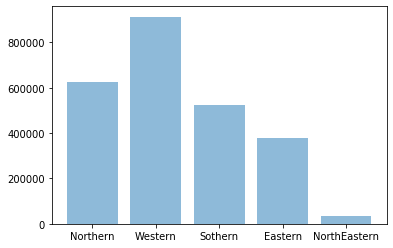

In [135]:
x_pos=np.arange(len(RWEG['Region']))

plt.bar(x_pos, RWEG['Energy Generated'], align='center', alpha=0.5)
plt.xticks(x_pos, RWEG['Region'])

#plt.xlabel('Region')
#plt.ylabel('Energy Generated in MU')
#plt.title('Region Wise Energy Generated')

plt.show()